In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline
from datetime import timedelta, datetime

In [2]:
colnames=['date', 'time','destination','student_id', 'cohort',
          'ip' ]
df = pd.read_csv('curriculum-access.txt', engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 1, 2, 3, 4, 5, 6])

In [3]:
df

,date,time,destination,student_id,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...,...,...
543591,2020-05-15,15:01:40,java-ii/file-io,602,56.0,48.188.241.68
543592,2020-05-15,15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
543593,2020-05-15,15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17
543594,2020-05-15,15:05:14,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


In [4]:
df['datetime'] = df['date'] + ' ' + df['time']

In [5]:
df['datetime'] = pd.to_datetime(df.datetime)

In [6]:
df = df.drop(columns = ['date', 'time'])

In [7]:
df = df.set_index('datetime')

In [8]:
df.head(3)

,destination,student_id,cohort,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62


In [146]:
df[df.cohort.isnull()]

,destination,student_id,cohort,ip
datetime,,,,
2018-01-26 16:46:16,/,48,NaN,98.106.20.62
2018-01-26 16:46:24,spring/extra-features/form-validation,48,NaN,98.106.20.62
2018-01-26 17:54:24,/,48,NaN,98.106.20.62
2018-01-26 18:32:03,/,48,NaN,98.106.20.62
2018-01-26 18:32:17,mysql/relationships/joins,48,NaN,98.106.20.62
...,...,...,...,...
2020-05-13 16:30:22,8-clustering/project,349,NaN,157.81.5.3
2020-05-13 16:30:38,8-clustering/5-model,349,NaN,157.81.5.3
2020-05-13 17:36:13,/,366,NaN,100.89.63.138


In [143]:
df[df.destination.isnull()]

,destination,student_id,cohort,ip
datetime,,,,
2020-04-08 09:25:18,NaN,586,55.0,73.178.241.52


In [139]:
df.shape

(543596, 4)

In [144]:
df[df.student_id.isnull()]

,destination,student_id,cohort,ip
datetime,,,,


In [9]:
curie = df[df.cohort == 55]

In [10]:
curie

,destination,student_id,cohort,ip
datetime,,,,
2020-02-03 15:39:34,login,575,55.0,98.106.20.59
2020-02-03 15:39:35,/,576,55.0,98.106.20.59
2020-02-03 15:39:37,/,577,55.0,98.106.20.59
2020-02-03 15:39:37,login,575,55.0,98.106.20.59
2020-02-03 15:39:43,/,578,55.0,98.106.20.59
...,...,...,...,...
2020-05-15 14:46:46,search/search_index.json,591,55.0,174.176.101.202
2020-05-15 14:47:01,appendix/professional-development/t-block-less...,591,55.0,174.176.101.202
2020-05-15 14:49:50,appendix/professional-development/vertical-resume,591,55.0,174.176.101.202


In [12]:
curie.resample('30T').max()

,student_id,cohort,ip
datetime,,,
2020-02-03 15:30:00,589.0,55.0,98.106.20.59
2020-02-03 16:00:00,NaN,NaN,NaN
2020-02-03 16:30:00,589.0,55.0,71.131.128.114
2020-02-03 17:00:00,NaN,NaN,NaN
2020-02-03 17:30:00,NaN,NaN,NaN
...,...,...,...
2020-05-15 13:00:00,NaN,NaN,NaN
2020-05-15 13:30:00,586.0,55.0,73.191.188.174
2020-05-15 14:00:00,590.0,55.0,73.191.188.174


In [201]:
df.destination.value_counts()

/                                 28920
javascript-i                      10950
search/search_index.json          10859
toc                                9839
html-css                           8202
                                  ...  
appendix/css-practice                 1
ui/typography                         1
content/examples/php/Input.php        1
About_NLP                             1
Regression_Python1                    1
Name: destination, Length: 1811, dtype: int64

In [220]:
instructors = df[df.cohort == 28]

In [229]:
instructors

,destination,student_id,cohort,ip,hour
datetime,,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28.0,98.106.20.59,14
2018-12-06 14:25:40,javascript-i,314,28.0,98.106.20.59,14
2018-12-06 14:25:41,javascript-i/coffee-project,314,28.0,98.106.20.59,14
2018-12-06 15:31:29,spring,40,28.0,171.249.174.248,15
2018-12-06 15:31:33,spring/fundamentals/security,40,28.0,171.249.174.248,15
...,...,...,...,...,...
2020-05-15 14:52:04,10-anomaly-detection/4-detecting-timeseries-an...,11,28.0,77.186.132.227,14
2020-05-15 14:52:05,10-anomaly-detection/4-detecting-timeseries-an...,1,28.0,71.122.216.54,14
2020-05-15 14:52:13,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227,14


In [228]:
instructors['hour'] = instructors.index.hour

In [230]:
instructors

,destination,student_id,cohort,ip,hour
datetime,,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28.0,98.106.20.59,14
2018-12-06 14:25:40,javascript-i,314,28.0,98.106.20.59,14
2018-12-06 14:25:41,javascript-i/coffee-project,314,28.0,98.106.20.59,14
2018-12-06 15:31:29,spring,40,28.0,171.249.174.248,15
2018-12-06 15:31:33,spring/fundamentals/security,40,28.0,171.249.174.248,15
...,...,...,...,...,...
2020-05-15 14:52:04,10-anomaly-detection/4-detecting-timeseries-an...,11,28.0,77.186.132.227,14
2020-05-15 14:52:05,10-anomaly-detection/4-detecting-timeseries-an...,1,28.0,71.122.216.54,14
2020-05-15 14:52:13,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227,14


In [232]:
instructors[instructors.hour >20].student_id.value_counts()

11     221
314    167
1      117
428    105
514     91
545     86
404     81
64      74
546     73
370     31
572      8
248      7
53       6
312      5
211      5
315      3
41       1
Name: student_id, dtype: int64

In [263]:
instructors[instructors.student_id == 11]

,destination,student_id,cohort,ip,hour
datetime,,,,,
2018-12-07 09:05:02,/,11,28.0,98.106.20.59,9
2018-12-07 09:05:05,javascript-i,11,28.0,98.106.20.59,9
2018-12-07 09:07:57,javascript-i/coffee-project,11,28.0,98.106.20.59,9
2018-12-07 14:55:06,/,11,28.0,98.106.20.59,14
2018-12-07 14:55:11,java-ii,11,28.0,98.106.20.59,14
...,...,...,...,...,...
2020-05-15 14:51:48,10-anomaly-detection/5-detecting-with-clustering,11,28.0,77.186.132.227,14
2020-05-15 14:52:04,10-anomaly-detection/4-detecting-timeseries-an...,11,28.0,77.186.132.227,14
2020-05-15 14:52:13,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227,14


In [265]:
instructors_zach = df[df.student_id == 11]

In [266]:
instructors_zach

,destination,student_id,cohort,ip
datetime,,,,
2018-01-26 10:14:47,/,11,1.0,98.106.20.62
2018-01-26 10:14:51,javascript-i,11,1.0,98.106.20.62
2018-01-26 10:15:02,javascript-i/functions,11,1.0,98.106.20.62
2018-01-26 11:46:29,appendix/further-reading/javascript/hoisting.html,11,1.0,98.106.20.62
2018-01-26 11:46:39,appendix,11,1.0,98.106.20.62
...,...,...,...,...
2020-05-15 14:51:48,10-anomaly-detection/5-detecting-with-clustering,11,28.0,77.186.132.227
2020-05-15 14:52:04,10-anomaly-detection/4-detecting-timeseries-an...,11,28.0,77.186.132.227
2020-05-15 14:52:13,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


In [314]:
instructors_zach['hr'] = instructors_zach.index.hour
instructors_zach = instructors_zach.reset_index()

In [316]:
instructors_zach

,datetime,destination,student_id,cohort,ip,hr
0,2018-01-26 10:14:47,/,11,1.0,98.106.20.62,10
1,2018-01-26 10:14:51,javascript-i,11,1.0,98.106.20.62,10
2,2018-01-26 10:15:02,javascript-i/functions,11,1.0,98.106.20.62,10
3,2018-01-26 11:46:29,appendix/further-reading/javascript/hoisting.html,11,1.0,98.106.20.62,11
4,2018-01-26 11:46:39,appendix,11,1.0,98.106.20.62,11
...,...,...,...,...,...,...
11060,2020-05-15 14:51:48,10-anomaly-detection/5-detecting-with-clustering,11,28.0,77.186.132.227,14
11061,2020-05-15 14:52:04,10-anomaly-detection/4-detecting-timeseries-an...,11,28.0,77.186.132.227,14
11062,2020-05-15 14:52:13,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227,14
11063,2020-05-15 14:52:38,10-anomaly-detection/2-continuous-probabilisti...,11,28.0,77.186.132.227,14


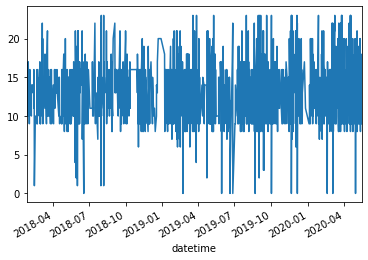

In [269]:
instructors_zach.hr.plot()

Text(0, 0.5, 'hour of day')

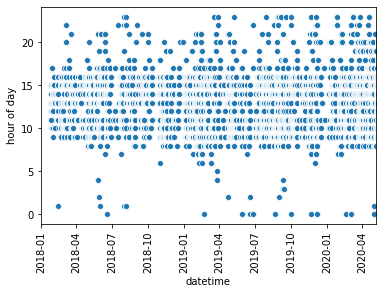

In [322]:
sns.scatterplot(x = 'datetime', y = 'hr', data = instructors_zach)
plt.xlim('2018-01-01', '2020-05-05')
plt.xticks(rotation = 90)
plt.ylabel('hour of day')

In [270]:
curie 

,destination,student_id,cohort,ip
datetime,,,,
2020-02-03 15:39:34,login,575,55.0,98.106.20.59
2020-02-03 15:39:35,/,576,55.0,98.106.20.59
2020-02-03 15:39:37,/,577,55.0,98.106.20.59
2020-02-03 15:39:37,login,575,55.0,98.106.20.59
2020-02-03 15:39:43,/,578,55.0,98.106.20.59
...,...,...,...,...
2020-05-15 14:46:46,search/search_index.json,591,55.0,174.176.101.202
2020-05-15 14:47:01,appendix/professional-development/t-block-less...,591,55.0,174.176.101.202
2020-05-15 14:49:50,appendix/professional-development/vertical-resume,591,55.0,174.176.101.202


In [333]:
curie = curie.reset_index()

In [334]:
curie['hour'] = curie.datetime.dt.hour

In [335]:
curie

,datetime,destination,student_id,cohort,ip,hour
0,2020-02-03 15:39:34,login,575,55.0,98.106.20.59,15
1,2020-02-03 15:39:35,/,576,55.0,98.106.20.59,15
2,2020-02-03 15:39:37,/,577,55.0,98.106.20.59,15
3,2020-02-03 15:39:37,login,575,55.0,98.106.20.59,15
4,2020-02-03 15:39:43,/,578,55.0,98.106.20.59,15
...,...,...,...,...,...,...
14247,2020-05-15 14:46:46,search/search_index.json,591,55.0,174.176.101.202,14
14248,2020-05-15 14:47:01,appendix/professional-development/t-block-less...,591,55.0,174.176.101.202,14
14249,2020-05-15 14:49:50,appendix/professional-development/vertical-resume,591,55.0,174.176.101.202,14
14250,2020-05-15 15:00:58,9-timeseries/4-explore,588,55.0,71.95.165.84,15


In [337]:
curie['student_id'] = 's' + curie['student_id'].apply(str)

In [338]:
curie

,datetime,destination,student_id,cohort,ip,hour
0,2020-02-03 15:39:34,login,s575,55.0,98.106.20.59,15
1,2020-02-03 15:39:35,/,s576,55.0,98.106.20.59,15
2,2020-02-03 15:39:37,/,s577,55.0,98.106.20.59,15
3,2020-02-03 15:39:37,login,s575,55.0,98.106.20.59,15
4,2020-02-03 15:39:43,/,s578,55.0,98.106.20.59,15
...,...,...,...,...,...,...
14247,2020-05-15 14:46:46,search/search_index.json,s591,55.0,174.176.101.202,14
14248,2020-05-15 14:47:01,appendix/professional-development/t-block-less...,s591,55.0,174.176.101.202,14
14249,2020-05-15 14:49:50,appendix/professional-development/vertical-resume,s591,55.0,174.176.101.202,14
14250,2020-05-15 15:00:58,9-timeseries/4-explore,s588,55.0,71.95.165.84,15


(737457.6263194444, 737560.6263194444)

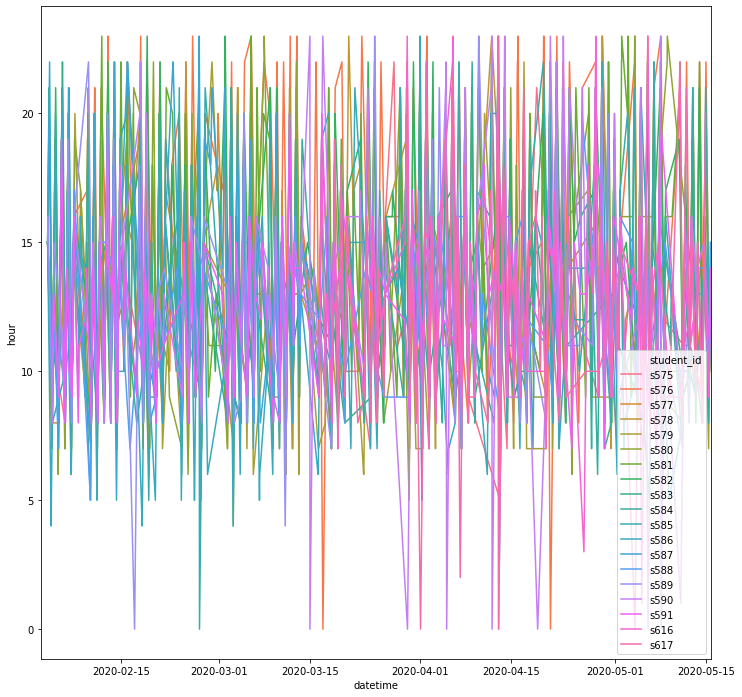

In [342]:
plt.figure(figsize = (12,12))
sns.lineplot(x = 'datetime', y = 'hour', data = curie, hue = 'student_id')
plt.xlim('2020-02-02 15:01:54','2020-05-15 15:01:54')